In [124]:
import pandas as pd
import numpy as np
import matplotlib as plt

### FAULTSJ1939 DATA

In [ ]:
faults = pd.read_csv('../data/J1939Faults.csv')

In [ ]:
print(faults.shape)

In [ ]:
faults = faults.drop(['ecuSoftwareVersion', 'ecuSerialNumber', 'ecuModel', 'ecuSource'], axis = 1)
faults = faults.drop(['faultValue'], axis = 1)

In [ ]:
faults['EquipmentID'] = faults['EquipmentID'].astype(str)

allId = faults['EquipmentID'].unique().tolist()

truckId = []
for x in range(0, len(allId)):
    if len(allId[x]) < 5:
        truckId.append(allId[x])
    else:
        pass

In [ ]:
faults.head()

In [ ]:
faults['RecordID'].nunique()

In [ ]:
faults.drop_duplicates().shape

In [ ]:
faults[faults['spn'] == 5246]['fmi'].unique()

In [ ]:
faults['spn'].nunique()

In [ ]:
faults['fmi'].nunique()

### FAULT CODES167 DATA

In [2]:
fault_codes167 = pd.read_excel('../data/ServiceFaultCodes_1_0_0_167.xlsx')
print(fault_codes167.shape)
fault_codes167.head(5)

(7124, 14)


C:\Users\16156\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Published in CES 14602,Cummins Fault Code,Revision,PID,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
0,Y,111,167,Not Mapped,254,0,12,629,12,P0606,Red,Stop / Shutdown,Engine Control Module Critical Internal Failur...,Error internal to the ECM related to memory ha...
1,Y,112,167,Not Mapped,20,128,7,635,7,Not Mapped,Red,Stop / Shutdown,Engine Timing Actuator Driver Circuit - Mechan...,Mechanical failure in the engine timing actuat...
2,Y,113,167,Not Mapped,20,128,3,635,3,Not Mapped,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...,High signal voltage detected at the engine tim...
3,Y,114,167,Not Mapped,20,128,4,635,4,Not Mapped,Amber,Warning,Engine Timing Actuator Driver Circuit - Voltag...,Low voltage detected at the engine timing actu...
4,Y,115,167,190,Not Mapped,Not Mapped,2,612,2,P0008,Red,Stop / Shutdown,Engine Magnetic Speed/Position Lost Both of Tw...,The ECM has detected that the primary and back...


In [36]:
fault_codes167[fault_codes167['SPN'] ==3362]

,Published in CES 14602,Cummins Fault Code,Revision,PID,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
1078,Y,1682,167,Not Mapped,Not Mapped,Not Mapped,11,3362,31,Not Mapped,Amber,Warning,Aftertreatment 1 Diesel Exhaust Fluid Dosing U...,Lack of urea or air to the doser unit
2408,Y,3569,167,Not Mapped,Not Mapped,Not Mapped,7,3362,7,Not Mapped,Amber,Warning,Aftertreatment 1 Diesel Exhaust Fluid Dosing U...,NaN
2917,Y,4295,167,Not Mapped,Not Mapped,Not Mapped,5,3362,5,Not Mapped,Amber,Warning,Aftertreatment 1 Diesel Exhaust Fluid Dosing U...,NaN


In [3]:
fault_codes167[fault_codes167['SPN'] ==5246]

,Published in CES 14602,Cummins Fault Code,Revision,PID,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
2518,Y,3712,167,Not Mapped,Not Mapped,Not Mapped,0,5246,0,Not Mapped,Red,Stop / Shutdown,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement of 5 mph derate - Fault Code 41...
2781,Y,4134,167,Not Mapped,Not Mapped,Not Mapped,0,5246,15,Not Mapped,Amber,Warning,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement - Least Severe - Fault Code 371...
4338,Y,6254,167,Not Mapped,Not Mapped,Not Mapped,0,5246,16,Not Mapped,Amber,Warning,Aftertreatment SCR Operator Inducement Severit...,NaN


In [4]:
fault_codes167.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Published in CES 14602  7124 non-null   object
 1   Cummins Fault Code      7124 non-null   int64 
 2   Revision                7124 non-null   int64 
 3   PID                     7124 non-null   object
 4   SID                     7124 non-null   object
 5   MID                     7124 non-null   object
 6   J1587 FMI               7124 non-null   int64 
 7   SPN                     7124 non-null   int64 
 8   J1939 FMI               7124 non-null   int64 
 9   J2012 Pcode             7124 non-null   object
 10  Lamp Color              7124 non-null   object
 11  Lamp Device             7124 non-null   object
 12  Cummins Description     7124 non-null   object
 13  Algorithm Description   2005 non-null   object
dtypes: int64(5), object(9)
memory usage: 779.3+ KB


### VDiagnostic DATA

Contains vehicle diagnostic data from when a fault occurred
       
Warning: Not everything is recorded for every fault code, so there are a large number of missing values in this dataset.

Can be matched with the J1939 (**faults**) file using **FaultId = RecordID**

In [5]:
vdiagnostic = pd.read_csv('../data/VehicleDiagnosticOnboardData.csv')
print(vdiagnostic.shape)

(12821626, 4)


In [6]:
vdiagnostic['FaultId'].nunique()

1187335

there are 1.2 mil fault codes

In [7]:
vdiagnostic.head(10)

,Id,Name,Value,FaultId
0,1,IgnStatus,False,1
1,2,EngineOilPressure,0,1
2,3,EngineOilTemperature,96.74375,1
3,4,TurboBoostPressure,0,1
4,5,EngineLoad,11,1
5,6,AcceleratorPedal,0,1
6,7,IntakeManifoldTemperature,78.8,1
7,8,FuelRate,0,1
8,9,FuelLtd,12300.907429328,1
9,10,EngineRpm,0,1


In [8]:
vdiagnostic.groupby('FaultId')['Name'].nunique()

FaultId
1          21
2           2
3           1
4           2
5           1
           ..
1248454     1
1248455    22
1248456    20
1248457    22
1248458     1
Name: Name, Length: 1187335, dtype: int64

In [9]:
vdiagnostic.groupby('FaultId')['Name'].nunique().sum()

12821626

In [10]:
#for faultid =1, there are 21 different names
vdiagnostic[vdiagnostic['FaultId']==1]['Name'].unique()

array(['IgnStatus', 'EngineOilPressure', 'EngineOilTemperature',
       'TurboBoostPressure', 'EngineLoad', 'AcceleratorPedal',
       'IntakeManifoldTemperature', 'FuelRate', 'FuelLtd', 'EngineRpm',
       'LampStatus', 'BarometricPressure', 'FuelLevel', 'Speed',
       'EngineTimeLtd', 'CruiseControlSetSpeed', 'CruiseControlActive',
       'EngineCoolantTemperature', 'ParkingBrake',
       'SwitchedBatteryVoltage', 'DistanceLtd'], dtype=object)

In [ ]:
#active tells if fault light is on True/False

In [11]:
vdiag_piv = vdiagnostic.pivot(index = 'FaultId', columns = 'Name', values='Value').reset_index()
vdiag_piv

Name,FaultId,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
0,1,0,14.21,False,66.48672,423178.7,100.4,11,0,96.74375,...,NaN,False,78.8,1023,True,NaN,0,3276.75,NaN,0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16639,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187330,1248454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
1187331,1248455,100,14.5,True,64.6226,423937.9,185,51,37.12,211.4937,...,32,True,98.6,18431,False,NaN,65.01096,NaN,73.2,7.83
1187332,1248456,0,14.355,True,66.48672,465925.4,186.8,62,41.18,212.8438,...,NaN,True,91.4,17407,NaN,NaN,66.5741,NaN,100,6.96
1187333,1248457,1.6,14.4275,False,67.72946,28606.65625,181.4,0,27.26,221.7312,...,NaN,True,100.4,1023,False,NaN,11.84489,14.1,100,1.74


In [12]:
vdiag_piv['FaultId'].nunique()

1187335

In [13]:
updatedFaults = pd.read_csv('../data/updatedFaults.csv')
updatedFaults.head()

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,990360,2015-02-21 11:34:34.000,NaN,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,990416,2015-02-21 11:39:41.000,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000


In [14]:
faults_diagnostics = pd.merge(vdiag_piv, updatedFaults, how = 'inner', left_on='FaultId', right_on='RecordID' )
faults_diagnostics.head()

,FaultId,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,...,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,1,0,14.21,False,66.48672,423178.7,100.4,11,0,96.74375,...,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000


In [15]:
faults_diagnostics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054113 entries, 0 to 1054112
Data columns (total 45 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   FaultId                    1054113 non-null  int64  
 1   AcceleratorPedal           479193 non-null   object 
 2   BarometricPressure         529391 non-null   object 
 3   CruiseControlActive        519277 non-null   object 
 4   CruiseControlSetSpeed      520327 non-null   object 
 5   DistanceLtd                529249 non-null   object 
 6   EngineCoolantTemperature   529379 non-null   object 
 7   EngineLoad                 528917 non-null   object 
 8   EngineOilPressure          529499 non-null   object 
 9   EngineOilTemperature       527871 non-null   object 
 10  EngineRpm                  529813 non-null   object 
 11  EngineTimeLtd              525550 non-null   object 
 12  FuelLevel                  454011 non-null   object 
 13  FuelLtd     

In [16]:
faults_diagnostics.describe()

,FaultId,RecordID,ESS_Id,actionDescription,ecuSource,spn,fmi,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude
count,1.054113e+06,1.054113e+06,1.054113e+06,0.0,1.054113e+06,1.054113e+06,1.054113e+06,1.054113e+06,0.0,1.054113e+06,1.054113e+06,1.054113e+06,1.054113e+06
mean,6.041317e+05,6.041317e+05,2.447195e+07,NaN,2.259714e+01,2.684396e+03,1.086914e+01,7.876715e+01,NaN,1.659558e+03,1.054243e+08,3.659023e+01,-8.385594e+01
std,3.561356e+05,3.561356e+05,2.900120e+07,NaN,2.350419e+01,2.603123e+04,7.152324e+00,5.867554e+01,NaN,2.537570e+02,2.976864e+05,3.107955e+00,4.789903e+00
min,1.000000e+00,1.000000e+00,9.903490e+05,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,3.010000e+02,1.053013e+08,0.000000e+00,-1.233710e+02
25%,2.947280e+05,2.947280e+05,6.038895e+06,NaN,0.000000e+00,1.110000e+02,3.000000e+00,1.000000e+00,NaN,1.586000e+03,1.053561e+08,3.501935e+01,-8.642074e+01
50%,5.984300e+05,5.984300e+05,1.189552e+07,NaN,1.100000e+01,6.290000e+02,9.000000e+00,1.260000e+02,NaN,1.641000e+03,1.054104e+08,3.644088e+01,-8.429055e+01
75%,9.029370e+05,9.029370e+05,3.092467e+07,NaN,4.900000e+01,9.290000e+02,1.700000e+01,1.260000e+02,NaN,1.806000e+03,1.054272e+08,3.900792e+01,-8.099255e+01
max,1.248458e+06,1.248458e+06,1.239061e+08,NaN,6.100000e+01,5.242870e+05,3.100000e+01,1.270000e+02,NaN,2.381000e+03,1.086168e+08,4.810009e+01,0.000000e+00


#Notes from Rohit/Neda
chi square - Which specific diagnostic to see if only certain faults occur more than others 

rolling window observation window - for each observation, was there a fault or not

pandas rolling window

survival analysis-

observation prediction window


ML PART --HOW DO YOU WANT TO SPLIT YOUR TRAIN/TEST


In [33]:
faults_diagnostics[faults_diagnostics['spn'] ==3362]

,FaultId,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,...,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
1984,2294,0,14.79,False,64.6226,393557.9,185,14,23.2,192.2563,...,3362,31,True,1,NaN,1487,105369355,25.861342,-80.371851,2015-02-23 07:56:44.000
10444,12321,NaN,13.5575,True,66.48672,556451.8,188.6,100,34.8,212.8438,...,3362,31,True,1,NaN,1370,105349462,36.876574,-81.397361,2015-03-24 11:07:51.000
15744,18123,0,14.355,True,66.48672,3978.711,179.6,38,38.86,221.7312,...,3362,31,True,1,NaN,1785,105455706,36.174722,-86.022592,2015-04-10 10:08:46.000
16950,19457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3362,31,True,1,NaN,1785,105455706,36.130416,-85.478703,2015-04-12 05:43:21.000
17029,19541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3362,31,False,1,NaN,1785,105455706,35.876388,-84.235370,2015-04-12 08:14:05.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049680,1242237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3362,31,False,1,NaN,1862,105460287,37.942638,-77.463981,2020-02-14 18:44:15.000
1049997,1242588,0,13.485,False,64.00124,407379.5,150.8,0,39.44,211.1,...,3362,31,True,1,NaN,1817,105426140,35.607453,-82.329027,2020-02-17 05:38:55.000
1050051,1242653,100,14.355,False,64.6226,527856.6,185,43,39.44,210.425,...,3362,31,True,1,NaN,1814,105369518,35.828333,-86.414629,2020-02-17 10:45:15.000
1053928,1248253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3362,31,False,1,NaN,1817,105426140,38.964537,-78.439675,2020-03-06 03:51:17.000


In [24]:
updatedFaults['eventDescription'].unique()

array(['Low (Severity Low) Engine Coolant Level', nan,
       'Incorrect Data Steering Wheel Angle',
       'High (Severity Low) Water In Fuel Indicator',
       'Incorrect Data Brake Signal Sensor 1',
       'High Voltage (Fuel Level)',
       'High Voltage (Left Fuel Level Sensor)',
       'Condition Exists Cruise Control Enable Switch',
       'Abnormal Update Rate Tire Location',
       'Condition Exists Engine Protection Torque Derate',
       'Incorrect Data Engine Intake Manifold #1 Pressure',
       'Incorrect Data Brake Signal Sensor 2',
       'Special Instructions System Diagnostic Code #1',
       'Special Instructions Wheel Sensor ABS Axle 2 Left',
       'Data May Be Invalid Relative Speed; Rear Axle #1 Left Wheel',
       'Incorrect Data Wheel Sensor ABS Axle 3 Left',
       'Low (Severity Medium) Engine Oil Pressure',
       'Incorrect Data Wheel Sensor ABS Axle 2 Left',
       'Not Reporting Data Front Operator Wiper Switch',
       'Special Instructions Wheel Sensor A

In [28]:
faults_diagnostics.select_dtypes(include='number')

,FaultId,RecordID,ESS_Id,actionDescription,ecuSource,spn,fmi,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude
0,1,1,990349,NaN,0,111,17,2,NaN,1439,105354361,38.857638,-84.626851
1,2,2,990360,NaN,11,629,12,127,NaN,1439,105354361,38.857638,-84.626851
2,3,3,990364,NaN,11,1807,2,127,NaN,1369,105336226,41.421250,-87.767361
3,4,4,990370,NaN,11,1807,2,127,NaN,1369,105336226,41.421018,-87.767361
4,5,5,990416,NaN,0,4364,17,2,NaN,1674,105427130,38.416481,-89.442638
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054108,1248454,1248454,123904424,NaN,0,1761,17,3,NaN,2282,105439740,37.094768,-85.897407
1054109,1248455,1248455,123905139,NaN,0,1569,31,5,NaN,1994,105354084,34.390740,-79.461805
1054110,1248456,1248456,123905996,NaN,0,3216,10,1,NaN,1850,105336308,34.430370,-84.920509
1054111,1248457,1248457,123906113,NaN,0,111,18,8,NaN,2377,108605700,35.030925,-85.321527


In [31]:
faults_diagnostics.iloc[:, 13:].head(10)

,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,...,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,12300.907429328,0,NaN,False,78.8,1023,True,NaN,0,3276.75,...,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,NaN,NaN,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,...,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,NaN,NaN,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,...,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,NaN,NaN,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,...,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,NaN,NaN,NaN,NaN,NaN,16639,NaN,NaN,NaN,NaN,...,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000
5,70349.809963756,4.583399,NaN,True,111.2,1023,NaN,NaN,13.6022,3276.75,...,111,17,True,1,NaN,1417,105438630,33.043564,-96.179722,2015-02-21 11:40:59.000
6,40961.065436834,14.29175,NaN,True,78.8,1023,NaN,NaN,41.53478,3276.75,...,111,17,True,2,NaN,1597,105344243,36.902916,-86.436481,2015-02-21 11:41:29.000
7,NaN,NaN,NaN,True,NaN,1023,NaN,NaN,NaN,NaN,...,111,17,True,1,NaN,1429,105356054,38.228796,-84.582500,2015-02-21 11:41:44.000
8,NaN,NaN,NaN,True,NaN,1023,NaN,NaN,NaN,NaN,...,97,15,True,1,NaN,1429,105356054,38.228796,-84.582500,2015-02-21 11:41:44.000
9,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,...,111,17,False,1,NaN,1417,105438630,33.039953,-96.182592,2015-02-21 11:41:51.000


In [41]:
faults_diagnostics['AcceleratorPedal'] = faults_diagnostics['AcceleratorPedal'].str.replace(',', '.').astype(float)

In [57]:
faults_diagnostics[colstoconvert].dtypes

DistanceLtd                  float64
EngineCoolantTemperature     float64
EngineLoad                   float64
EngineOilPressure            float64
EngineOilTemperature         float64
EngineRpm                    float64
EngineTimeLtd                float64
FuelLevel                    float64
FuelLtd                      float64
FuelRate                     float64
FuelTemperature              float64
IntakeManifoldTemperature    float64
ServiceDistance              float64
Speed                        float64
SwitchedBatteryVoltage       float64
activeTransitionCount          int64
dtype: object

In [ ]:
#converting to float if not already
colstoconvert = ['DistanceLtd', 'EngineCoolantTemperature', 'EngineLoad', 
                  'EngineOilPressure', 'EngineOilTemperature', 'EngineRpm',
                  'EngineTimeLtd', 'FuelLevel', 'FuelLtd', 'FuelRate', 'FuelTemperature',  
                 'IntakeManifoldTemperature', 'ServiceDistance', 'Speed', 
                  'SwitchedBatteryVoltage', 'activeTransitionCount']

for col in faults_diagnostics[colstoconvert]:
    faults_diagnostics[col]= faults_diagnostics[col].astype(float)

In [59]:
faults_diagnostics.iloc[:, 0:].head()

,FaultId,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,...,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,1,0.0,14.21,False,66.48672,423178.7,100.4,11.0,0.0,96.74375,...,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000


In [62]:
faults_diagnostics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054113 entries, 0 to 1054112
Data columns (total 45 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   FaultId                    1054113 non-null  int64  
 1   AcceleratorPedal           479193 non-null   float64
 2   BarometricPressure         529391 non-null   float64
 3   CruiseControlActive        519277 non-null   object 
 4   CruiseControlSetSpeed      520327 non-null   float64
 5   DistanceLtd                529249 non-null   float64
 6   EngineCoolantTemperature   529379 non-null   float64
 7   EngineLoad                 528917 non-null   float64
 8   EngineOilPressure          529499 non-null   float64
 9   EngineOilTemperature       527871 non-null   float64
 10  EngineRpm                  529813 non-null   float64
 11  EngineTimeLtd              525550 non-null   float64
 12  FuelLevel                  454011 non-null   float64
 13  FuelLtd     

In [76]:
#faults_diagnostics.to_csv('../data/faults_diagnostics.csv')

In [118]:
faults_diagnostics = pd.read_csv('../data/faults_diagnostics.csv')
faults_diagnostics

<ipython-input-118-33c8ec0bdc76>:1: DtypeWarning: Columns (24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  faults_diagnostics = pd.read_csv('../data/faults_diagnostics.csv')


,Unnamed: 0,FaultId,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,...,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,0,1,0.0,14.2100,False,66.48672,423178.70000,100.4,11.0,0.00,...,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054108,1054108,1248454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1761,17,False,3,NaN,2282,105439740,37.094768,-85.897407,2020-03-06 14:00:21.000
1054109,1054109,1248455,100.0,14.5000,True,64.62260,423937.90000,185.0,51.0,37.12,...,1569,31,True,5,NaN,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000
1054110,1054110,1248456,0.0,14.3550,True,66.48672,465925.40000,186.8,62.0,41.18,...,3216,10,True,1,NaN,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000
1054111,1054111,1248457,1.6,14.4275,False,67.72946,28606.65625,181.4,0.0,27.26,...,111,18,True,8,NaN,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000


In [88]:
faults_diagnostics['EquipmentID'].nunique()

1040

In [89]:
faults_diagnostics['ecuMake'].unique()

array(['unknown', 'VOLVO', 'CMMNS', '?????', 'PCAR', nan, '?MMNS', '?CAR',
       '???R', '?????MX', '??MNS', 'BNDWS', 'PACCR', '?ACCR', '????S',
       '?NDWS', '????R', 'EATON', '?????MX16U13D13', '?ATON', '???CR',
       '5516014'], dtype=object)

In [72]:
import re

In [92]:
faults_diagnostics['ecuMake'] = faults_diagnostics['ecuMake'].str.replace(re.escape("?ATON"), 'EATON')

<ipython-input-92-91f87000c8e1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  faults_diagnostics['ecuMake'] = faults_diagnostics['ecuMake'].str.replace(re.escape("?ATON"), 'EATON')


In [97]:
faults_diagnostics['ecuMake'].unique()

array(['unknown', 'VOLVO', 'CMMNS', '?????', 'PCAR', nan, '?MMNS', '?CAR',
       '???R', '?????MX', '??MNS', 'BNDWS', 'PACCR', '????S', '?NDWS',
       '????R', 'EATON', '?????MX16U13D13', '???CR', '5516014'],
      dtype=object)

In [96]:
faults_diagnostics['ecuMake'] = faults_diagnostics['ecuMake'].str.replace(re.escape('?ACCR'), 'PCAR')

<ipython-input-96-bbac90e27fbf>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  faults_diagnostics['ecuMake'] = faults_diagnostics['ecuMake'].str.replace(re.escape('?ACCR'), 'PCAR')


In [113]:
#faults_diagnostics['ecuMake'] = 
faults_diagnostics['ecuMake'].str.replace(re.escape('???CR'), 'PCAR')\
.str.replace(re.escape('?CAR'), 'PCAR')\
.str.replace(re.escape('PACCR'), 'PCAR')
.str.replace(re.escape('???R'), 'PCAR')\
.str.replace(re.escape('?PCAR'), 'PCAR')\
.str.replace(re.escape('?????MX16U13D13'), 'PCAR')\
.str.replace(re.escape('?????MX'), 'PCAR')\
.str.replace(re.escape('?NDWS'), 'CMMNS')\
.str.replace(re.escape('????S'), 'CMMNS')\
.str.replace(re.escape('?MMNS'), 'CMMNS').str.replace(re.escape('??MNS'), 'CMMNS').str.replace('5516014', 'CMMNS').unique()


SyntaxError: invalid syntax (<ipython-input-113-3aa5d06594f2>, line 5)

In [119]:
faults_diagnostics['ecuMake'] = faults_diagnostics['ecuMake'].replace({'VOLVO': 'Volvo', 'CMMNS': 'Cummins', \
                                                      '?MMNS': 'Cummins', 'PCAR': 'PACCAR', \
                                                      '?CAR': 'PACCAR', 'PACCR': 'PACCAR', \
                                                      'EATON': 'Eaton', '?ACCR': 'PACCAR', \
                                                      '????R': 'PACCAR', 'BNDWS': 'unknown', \
                                                      '?????MX': 'PACCAR', '?????MX16U13D13': 'PACCAR', \
                                                      '?ATON': 'Eaton', '???CR': 'PACCAR', \
                                                      'nan': 'unknown', '5516014': 'Cummins', \
                                                      '?????': 'unknown', '????S': 'unknown', \
                                                      '?NDWS': 'Cummins', '???R': 'PACCAR', \
                                                      '??MNS': 'Cummins'})

In [132]:
faults_diagnostics['ecuMake'] = faults_diagnostics['ecuMake'].fillna('unknown')

In [133]:
faults_diagnostics['ecuMake'].unique()

array(['unknown', 'Volvo', 'Cummins', 'PACCAR', 'Eaton'], dtype=object)

#### cleaning ecumake column

In [82]:
# faults_diagnostics['ecuMake'] = faults_diagnostics['ecuMake']\

# .str.replace(re.escape('?ACCR'), 'PCAR')\
# .str.replace(re.escape('???CR'), 'PCAR')\
# .str.replace(re.escape('???CR'), 'PCAR')\
# .str.replace(re.escape('?CAR'), 'PCAR')\
# .str.replace(re.escape('PACCR'), 'PCAR')\
# .str.replace(re.escape('?ACCR'), 'PCAR')\
# .str.replace(re.escape('?NDWS'), 'BNDWS')\
# .str.replace(re.escape('????S'), 'BNDWS')
    

<ipython-input-82-07ab4e9d8b37>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  faults_diagnostics['ecuMake'] = faults_diagnostics['ecuMake']\


In [66]:
faults_diagnostics['ecuModel'].unique()

array(['unknown', '0USA13_13_0415_2238A', '6X1u10D1500000000',
       '6X1u13D1500000000', 'MX', nan, '20412511P07', '________Y043718',
       'EC60-adv', 'CECU3B-NAMUX4', 'EC80ESP', 'CE', '6U13D13',
       '6L u13D0890000000', '6X1u17D1500000000', 'MX16U13D13',
       'EEO-xxF112C', 'FAOM-xx810S-EC3', 'CECU3-NAMUX3',
       'Gen 4 Boot Loader', 'Y044053', 'EC80ESP+', 'EC80ESP AM000036',
       'Y049568', 'E0031', 'MX16U15D13', '202.35.0', '6X1u20D1500000000'],
      dtype=object)

In [134]:
faults_diagnostics.groupby('ecuMake')[colstoconvert].median()

,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IntakeManifoldTemperature,ServiceDistance,Speed,SwitchedBatteryVoltage,activeTransitionCount
ecuMake,,,,,,,,,,,,,,,,
Cummins,369586.50,185.0,28.0,36.54,208.4563,1266.000,7391.70,60.0,52680.860395,3.354995,32.0,98.6,-20989.917969,44.699890,3276.75,1.0
Eaton,79067.04,177.8,18.0,23.20,190.9625,600.625,1645.20,62.4,10654.455115,0.766101,NaN,120.2,NaN,0.000000,13.85,9.0
PACCAR,392138.00,181.4,15.0,33.06,199.7375,602.625,8094.75,53.2,52811.559518,0.779310,32.0,116.6,NaN,0.038836,13.95,126.0
Volvo,366722.90,177.8,28.5,45.82,225.7813,1290.250,6126.05,66.4,69664.811833,3.916363,144.5,118.4,NaN,43.306660,NaN,33.0
unknown,368419.30,181.4,18.0,36.54,201.0875,1008.000,6960.80,62.4,48788.615424,1.492577,32.0,114.8,37642.667969,6.543815,3276.75,126.0


In [128]:
import matplotlib.pyplot as plt

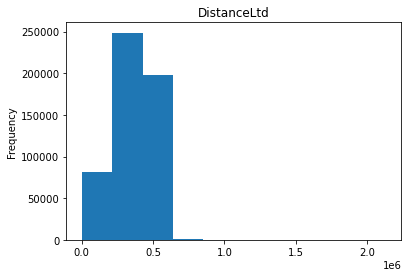

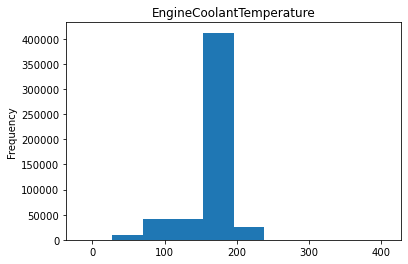

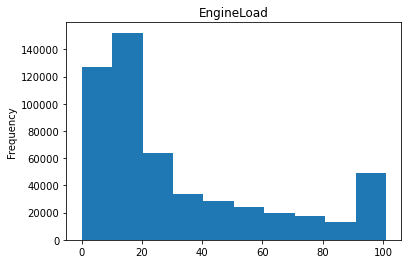

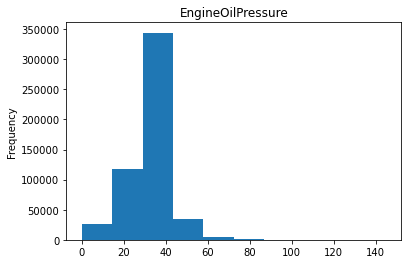

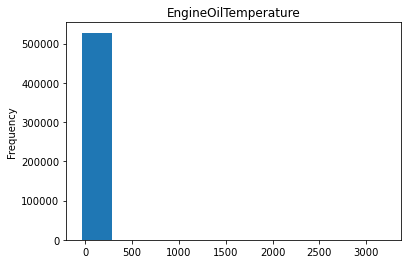

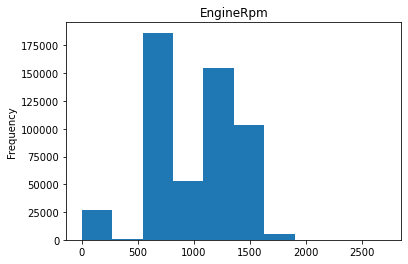

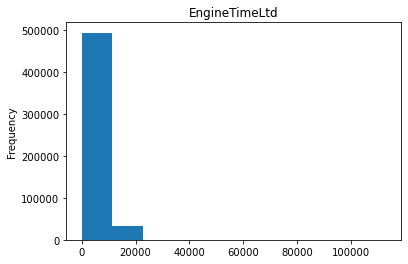

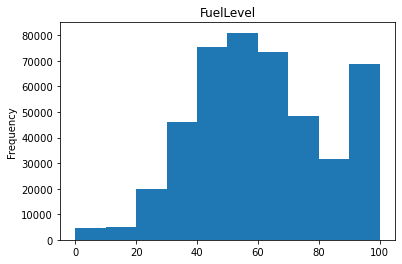

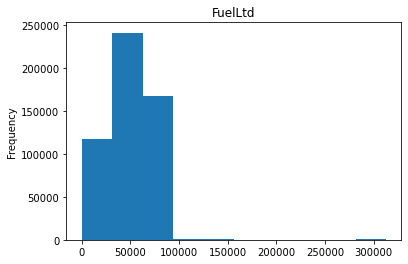

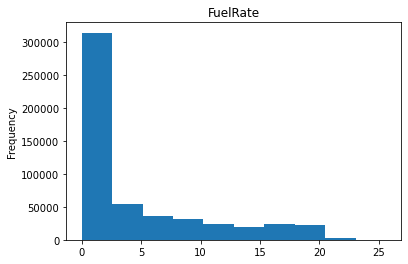

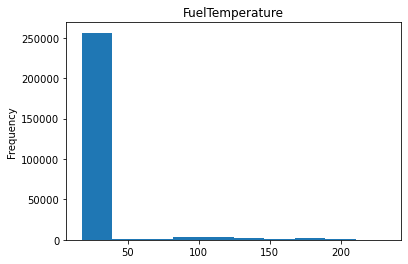

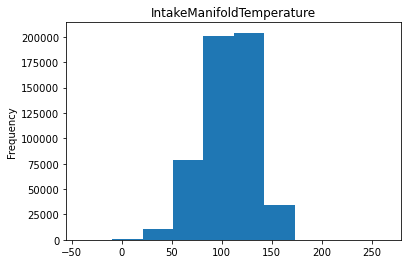

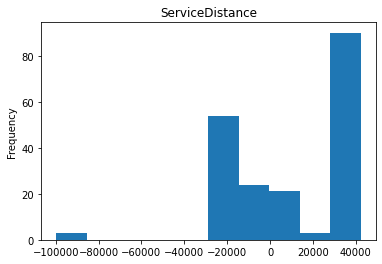

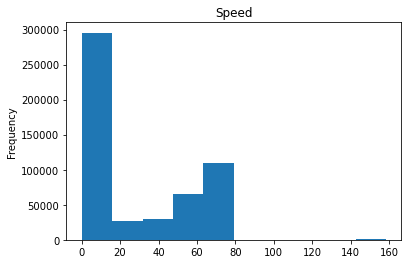

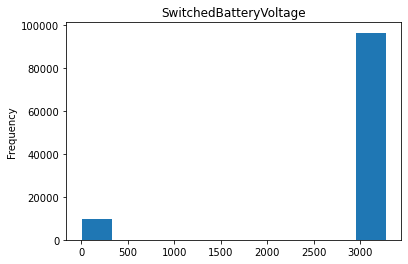

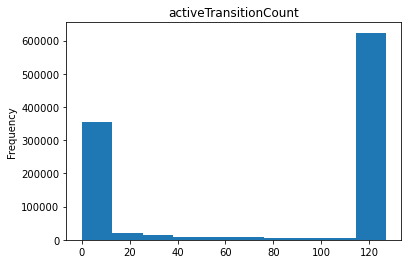

In [129]:
for col in faults_diagnostics[colstoconvert]:
    faults_diagnostics[col].plot.hist()
    plt.title(col)
    plt.show()

In [137]:
medians = faults_diagnostics.groupby('ecuMake')['EngineOilPressure'].median()

In [138]:
medians

ecuMake
Cummins    36.54
Eaton      23.20
PACCAR     33.06
Volvo      45.82
unknown    36.54
Name: EngineOilPressure, dtype: float64

In [140]:

faults_diagnostics.groupby('ecuMake', group_keys=True)['EngineOilPressure'].apply(lambda x: x.fillna(x.median()))

ecuMake         
Cummins  5          38.28
         7          36.54
         8          36.54
         9          36.54
         10         34.22
                    ...  
unknown  1054073    37.70
         1054074    36.54
         1054076    36.54
         1054111    27.26
         1054112    36.54
Name: EngineOilPressure, Length: 1054113, dtype: float64

# filling missing values with medians for numerics

In [143]:
colstoconvert = ['DistanceLtd', 'EngineCoolantTemperature', 'EngineLoad', 
                  'EngineOilPressure', 'EngineOilTemperature', 'EngineRpm',
                  'EngineTimeLtd', 'FuelLevel', 'FuelLtd', 'FuelRate', 'FuelTemperature',  
                 'IntakeManifoldTemperature', 'ServiceDistance', 'Speed', 
                  'SwitchedBatteryVoltage', 'activeTransitionCount']


for i in faults_diagnostics[colstoconvert]:
    medians = faults_diagnostics.groupby('ecuMake')[i].median()
    #print(medians)
    faults_diagnostics[i] = faults_diagnostics.groupby('ecuMake')[i].apply(lambda x: x.fillna(x.median()))

<ipython-input-143-7bc3995ce649>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  faults_diagnostics[i] = faults_diagnostics.groupby('ecuMake')[i].apply(lambda x: x.fillna(x.median()))
<ipython-input-143-7bc3995ce649>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  faults_diagnostics[i] = fault

In [148]:
colstoconvertb = ['AcceleratorPedal', 'BarometricPressure', 'CruiseControlSetSpeed']


for i in faults_diagnostics[colstoconvertb]:
    medians = faults_diagnostics.groupby('ecuMake')[i].median()
    #print(medians)
    faults_diagnostics[i] = faults_diagnostics.groupby('ecuMake')[i].apply(lambda x: x.fillna(x.median()))

<ipython-input-148-7723d672ba7b>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  faults_diagnostics[i] = faults_diagnostics.groupby('ecuMake')[i].apply(lambda x: x.fillna(x.median()))
<ipython-input-148-7723d672ba7b>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  faults_diagnostics[i] = fault

## drop columns

In [157]:
faults_diagnostics = faults_diagnostics.drop('Unnamed: 0', axis = 1)

In [175]:
faults_diagnostics = faults_diagnostics.drop(['actionDescription', 'faultValue', 'ServiceDistance'], axis = 1)

## checking if there are missing values left

In [158]:
faults_diagnostics.isna().sum()

FaultId                            0
AcceleratorPedal                   0
BarometricPressure                 0
CruiseControlActive           534836
CruiseControlSetSpeed           6574
DistanceLtd                        0
EngineCoolantTemperature           0
EngineLoad                         0
EngineOilPressure                  0
EngineOilTemperature               0
EngineRpm                          0
EngineTimeLtd                      0
FuelLevel                          0
FuelLtd                            0
FuelRate                           0
FuelTemperature                10611
IgnStatus                     507044
IntakeManifoldTemperature          0
LampStatus                         0
ParkingBrake                  701413
ServiceDistance               283212
Speed                              0
SwitchedBatteryVoltage          6574
Throttle                      679986
TurboBoostPressure            526810
RecordID                           0
ESS_Id                             0
E

In [176]:
missing = faults_diagnostics.columns[faults_diagnostics.isna().any()].tolist()
faults_diagnostics[missing].isna().sum()

CruiseControlActive       534836
CruiseControlSetSpeed       6574
FuelTemperature            10611
IgnStatus                 507044
ParkingBrake              701413
SwitchedBatteryVoltage      6574
Throttle                  679986
TurboBoostPressure        526810
eventDescription           50423
ecuSoftwareVersion        263851
ecuSerialNumber           305401
ecuModel                   55863
dtype: int64

In [180]:
faults_diagnostics[missing].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054113 entries, 0 to 1054112
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   CruiseControlActive     519277 non-null   object 
 1   CruiseControlSetSpeed   1047539 non-null  float64
 2   FuelTemperature         1043502 non-null  float64
 3   IgnStatus               547069 non-null   object 
 4   ParkingBrake            352700 non-null   object 
 5   SwitchedBatteryVoltage  1047539 non-null  float64
 6   Throttle                374127 non-null   object 
 7   TurboBoostPressure      527303 non-null   object 
 8   eventDescription        1003690 non-null  object 
 9   ecuSoftwareVersion      790262 non-null   object 
 10  ecuSerialNumber         748712 non-null   object 
 11  ecuModel                998250 non-null   object 
dtypes: float64(3), object(9)
memory usage: 96.5+ MB


In [182]:
faults_diagnostics['CruiseControlActive'].unique()

array([False, nan, True], dtype=object)

In [186]:
faults_diagnostics.groupby('CruiseControlActive')['CruiseControlSetSpeed'].count()

CruiseControlActive
False    468775
True      50502
Name: CruiseControlSetSpeed, dtype: int64

In [187]:
faults_diagnostics['CruiseControlSetSpeed'].unique()

array([66.48672,      nan, 64.6226 , 50.33107, 54.05929, 60.89438,
        0.     , 62.13712, 59.03026, 67.10809, 54.68066, 65.86535,
       40.38913, 63.37986, 58.40889, 57.16615, 65.24397, 60.27301,
       62.75849, 56.54478, 61.51575, 55.92341, 64.00124, 49.08833,
       55.30204, 59.65163, 57.78752, 44.11736, 52.19518, 41.63187,
       39.76776, 53.43792, 42.87461, 47.22421, 52.81655, 45.3601 ,
       43.49598, 36.03953, 44.73873, 47.84558, 45.98147, 48.46695,
       49.70969, 50.95244, 46.60284, 51.57381, 37.90364, 35.41816,
       30.44719, 29.82582, 41.0105 , 32.93267, 37.28227, 38.52501,
       29.20445, 31.68993, 34.17542, 34.79679, 33.55404, 42.25324,
       39.14639, 28.58307, 36.6609 , 31.06856, 67.72946, 32.3113 ,
       27.9617 , 68.35083, 68.97221, 69.59357, 70.83632, 70.21494,
       72.07906, 71.45769, 72.70043])

In [192]:
faults_diagnostics[faults_diagnostics['Speed'] == faults_diagnostics['CruiseControlSetSpeed']][['CruiseControlActive', 'Speed', 'CruiseControlSetSpeed']]

,CruiseControlActive,Speed,CruiseControlSetSpeed
1432,False,0.00000,0.00000
1469,False,0.00000,0.00000
1713,False,0.00000,0.00000
1782,True,67.10809,67.10809
1791,False,0.00000,0.00000
...,...,...,...
1053981,NaN,0.00000,0.00000
1054040,NaN,0.00000,0.00000
1054046,NaN,0.00000,0.00000
1054065,False,0.00000,0.00000


In [ ]:
#event description for codes spn and fmi

In [ ]:
# trucks5246 = faults.loc[faults['spn'] == 5246]['EquipmentID'].unique().tolist()

# trucks1569 = faults.loc[(faults['spn'] == 1569) & (faults['fmi'] == 31)]['EquipmentID'].unique().tolist()

In [ ]:
#data['LocationTimeStamp'] = 
pd.to_datetime(data['LocationTimeStamp'])